### Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of  classification problems:
    * Binary classification
    * Multi class classification
    * MultiLabel Classification

#### Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples = 1000

# Create Circles
X,y = make_circles(n_samples,
                    noise=.03,
                    random_state=42)

In [2]:
#Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
#Check out Labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [7]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1": X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


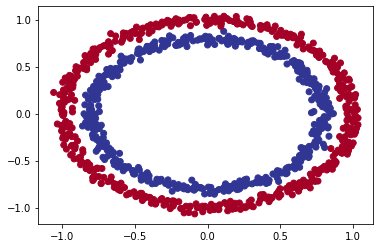

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

### Input and Output Shapes


In [9]:
# CHeck the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
#How many samples were working with

len(X), len(y)


(1000, 1000)

In [11]:
#View the first example of features and labels

X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in modelling


In [17]:
#MY MODEL
## 1. Create a model
import tensorflow as tf
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1000,2)),
    tf.keras.layers.Dense(500,activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(2, activation="sigmoid")
])

# 2 Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state = 42)
len(X), len(X_train), len(X_test)


(1000, 800, 200)

In [20]:
# 3. Fit the model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5


TypeError: 'NoneType' object is not callable

In [21]:
#Their Model
tf.random.set_seed(42)

#1 Create the model using the Sequential API

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#2 Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3 Fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 544us/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 560us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 467us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 435us/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 483us/step - loss: 0.6942 - accuracy: 0.4820


In [22]:
#LEt's improve by improving by training for longer.
model_1.fit(X,y,epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 655us/step - loss: 0.6945 - accuracy: 0.4900
Epoch 2/200
32/32 [==============================] - 0s 548us/step - loss: 0.6942 - accuracy: 0.4960
Epoch 3/200
32/32 [==============================] - 0s 509us/step - loss: 0.6947 - accuracy: 0.4470
Epoch 4/200
32/32 [==============================] - 0s 441us/step - loss: 0.6941 - accuracy: 0.4880
Epoch 5/200
32/32 [==============================] - 0s 439us/step - loss: 0.6940 - accuracy: 0.4800
Epoch 6/200
32/32 [==============================] - 0s 440us/step - loss: 0.6936 - accuracy: 0.5050

In [23]:
#Set random seed
tf.random.set_seed(42)

#1 Create a model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2 Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3 Fit the model
model_2.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 644us/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/100
32/32 [==============================] - 0s 552us/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 528us/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 589us/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 476us/step - loss: 0.7037 - accuracy: 0.5010
Epoch 6/100
32/32 [==============================] - 0s 514us/step - loss: 0.7008 - accuracy: 0.4960

#Improve the model

#How can we improve our model?

1. Create a model - add layers and/or hidden units
2. Compiling a model - choose different optimizers
3. Fitting a model - Train on longer, (Increase epochs)

In [24]:
tf.random.set_seed(42)

#1. create a model( this time 3 layers)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#3. Fit the model

model_3.fit(X,y, epochs=100)


Epoch 1/100
32/32 [==============================] - 0s 764us/step - loss: 2.9658 - accuracy: 0.4490
Epoch 2/100
32/32 [==============================] - 0s 678us/step - loss: 0.7229 - accuracy: 0.4390
Epoch 3/100
32/32 [==============================] - 0s 648us/step - loss: 0.6971 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 670us/step - loss: 0.6953 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 680us/step - loss: 0.6943 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 643us/step - loss: 0.6941 - accuracy: 0.4750

In [25]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 576us/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

In [26]:
model_3(X)

<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[0.48793247],
       [0.558876  ],
       [0.56292844],
       [0.5705067 ],
       [0.44141155],
       [0.57388204],
       [0.55764854],
       [0.48246646],
       [0.47755834],
       [0.5750227 ],
       [0.514849  ],
       [0.53087705],
       [0.5643773 ],
       [0.45787302],
       [0.45052725],
       [0.461299  ],
       [0.54055816],
       [0.4638092 ],
       [0.5479803 ],
       [0.50375676],
       [0.5063045 ],
       [0.5877546 ],
       [0.45902458],
       [0.4912332 ],
       [0.5832159 ],
       [0.57042557],
       [0.5523936 ],
       [0.4631735 ],
       [0.45773408],
       [0.45440972],
       [0.47872227],
       [0.5785604 ],
       [0.5554616 ],
       [0.46339142],
       [0.4584915 ],
       [0.5898668 ],
       [0.5724736 ],
       [0.52974397],
       [0.45870548],
       [0.51092887],
       [0.49994144],
       [0.5463086 ],
       [0.5109902 ],
       [0.4579724 ],
       [0.52232724],
    

#TO visualize our model's prediction letat create a function plot_decision_boundry, this function will:

*Take in a trained model, features(X), and labels(y)
* create a meshgrid of the different X values
*Make predictions across the mesh grid
* Plot the predictions as well as a line between zones(where each unique class falls)



In [ ]:
import numpy as np

def plot_decision_boundry(model,X,y):
    """
    Plots the decision boundry created by a model predicting on X
    :param model:
    :param X:
    :param y:
    :return:
    """
    #Define the axis boundry created by a model predicting on X.
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    xx,yy = np.meshgrid(np.linespace(x_min, x_max, 100),
                        np.linespace(y_min, y_mac, 100))

    #Create X value (Make predictions)

    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)

    #Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        #We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print()